In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# pip install --upgrade yfinance

In [3]:
import yfinance as yf

stocks = ['AAPL', 'BAC', 'AXP', 'KO']
df = pd.DataFrame()
for stock in stocks:
    df_stocks = yf.download(stock, start ='2011-12-20', end='2021-12-20')[['Close']]
    df_stocks.rename(columns={'Close':stock}, inplace=True)
    df = pd.concat([df, df_stocks], axis=1)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price             AAPL        BAC         AXP         KO
Ticker            AAPL        BAC         AXP         KO
Date                                                    
2011-12-20   11.915562   4.108701   39.764847  22.843864
2011-12-21   11.930608   4.156382   39.408039  23.234608
2011-12-22   11.993802   4.347115   39.524216  23.107698
2011-12-23   12.137654   4.450429   39.789764  23.358183
2011-12-27   12.233948   4.355061   39.549107  23.338139
...                ...        ...         ...        ...
2021-12-13  172.717758  40.024826  156.611725  52.772697
2021-12-14  171.331970  40.529957  156.180145  52.809242
2021-12-15  176.216553  40.355450  155.595154  53.046799
2021-12-16  169.297577  41.328979  156.324036  53.585857
2021-12-17  168.196838  40.300346  153.456482  52.745293

[2516 rows x 4 columns]

## Daily Return Rate of the 4 Stocks

In [4]:
df_returns = df.pct_change()
df_returns = df_returns.iloc[1:]
df_returns.head()

Price           AAPL       BAC       AXP        KO
Ticker          AAPL       BAC       AXP        KO
Date                                              
2011-12-21  0.001263  0.011605 -0.008973  0.017105
2011-12-22  0.005297  0.045889  0.002948 -0.005462
2011-12-23  0.011994  0.023766  0.006719  0.010840
2011-12-27  0.007933 -0.021429 -0.006048 -0.000858
2011-12-28 -0.009569 -0.034672 -0.014478 -0.005295

After getting the daily closing price changepercent of
each stock in the portfolio, the next step is to create a
portfolio of the four U.S stocks——Apple, Bank of
America, American Express and Coca-Cola——selected
according to the major heavy positions of Berkshire
Hathaway listed in the 2021 Q2 report

We have constructed a portfolio of four American
stocks, and the weight of the portfolio is 1:1 to that is on
the report. In this case, the initial investment amount of
the simulated constructed portfolio is set as $1,000,000

In [5]:
weights = np.array([0.4147, 0.1442, 0.0855, 0.0739])
ini_inves = 1000000

## Var - Cov Matrix of the 4 Stocks

Then combined with the daily return rate of the stock
obtained in the previous step, we establish the variance -
covariance (Var - Cov) matrix,

In [6]:
cov_matrix = df_returns.cov()
cov_matrix

Price             AAPL       BAC       AXP        KO
Ticker            AAPL       BAC       AXP        KO
Price Ticker                                        
AAPL  AAPL    0.000319  0.000131  0.000117  0.000064
BAC   BAC     0.000131  0.000397  0.000244  0.000089
AXP   AXP     0.000117  0.000244  0.000320  0.000097
KO    KO      0.000064  0.000089  0.000097  0.000122

After running, the variance-covariance (Var - Cov)
matrix, this enable us to calculate
the standard deviation and mean return of the entire
portfolio

In [7]:
# daily average return of the 4 stocks

avg_rets = df_returns.mean()
avg_rets

Price  Ticker
AAPL   AAPL      0.001213
BAC    BAC       0.001106
AXP    AXP       0.000695
KO     KO        0.000394
dtype: float64

In [8]:
# the average return of the entire portfolio

port_mean = np.dot(avg_rets, weights)
port_mean

0.0007510059808677633

In [9]:
# portfolio std deviation

port_std = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
port_std

0.010154122789616239

In [10]:
# average value of investment

mean_investment = (1+port_mean) * ini_inves
mean_investment

1000751.0059808678

In [11]:
# std deviation of the investment

stdev_investment = ini_inves * port_std
stdev_investment

10154.122789616238

## Percentile Point Function

we can estimate the
portfolio's value at risk (VaR) with a 95% confidence
interval by subtracting the value returned by the inverse
cumulative distribution function 

In [12]:
conf_level1 =0.05
from scipy.stats import norm

cutoffl = norm.ppf(conf_level1, mean_investment, stdev_investment)
cutoffl

984048.9602818569

If your initial investment was $1,000,000, a 5% probability exists that its value drops below 984,048.95 in the given time frame.

In [13]:
var_1dl = ini_inves - cutoffl
var_1dl

15951.03971814306

So we get the value at risk of the portfolio based on
the proportion of Berkshire Hathaway's major stock
holdings: VaR = 15951.04. Here, we have a
level of 95% confidence to say that our 1 million dollar portfolio will not lose more than $16,000 in a single
trading day

When it comes to a larger time horizon like the VaR
over n days, it can simply take the 1-day VaR and
multiply it by the square root of the time period (this is
because the standard deviation of stock returns will
increase with the square root of time)

20 days VaR based on given 1 day VaR

VaR of 20days [15951.04, 22558.18, 27628.01, 31902.08, 35667.61, 39071.91, 42202.48, 45116.35, 47853.12, 50441.62, 52903.61, 55256.02, 57512.29, 59683.33, 61778.11, 63804.16, 65767.82, 67674.53, 69528.97, 71335.22]
20 day VaR @ 95% confidence: 71335.22


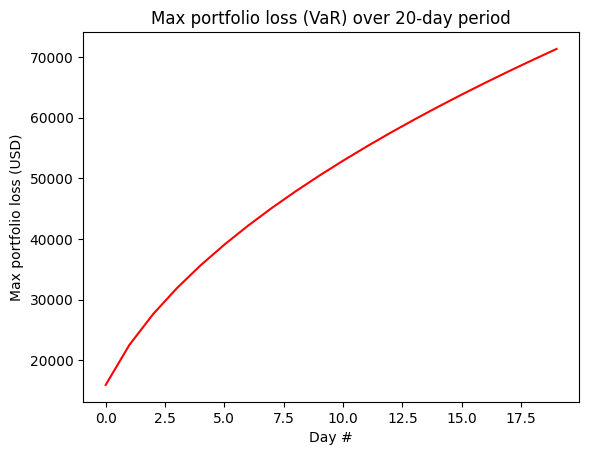

In [14]:
import matplotlib.pyplot as plt

var_array = []
num_days = int(20)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1dl * np.sqrt(x),2))

print('VaR of 20days',var_array)
print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1dl * np.sqrt(x),2))) 
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 20-day period")
plt.plot(var_array, "r")
plt.show()

Here, we have 95% confidence to say that our 1
million dollars portfolio will not lose more than $71,335.26
within 20 days

In [15]:
var_array = []
num_days = int(40)
for x in range(1, num_days+1):
    var_array.append(np.round(var_1dl * np.sqrt(x),2))

print('VaR of 40days',var_array)
print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1dl * np.sqrt(x),2))) 
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 40-day period")
plt.plot(var_array, "r")
plt.show()

VaR of 40days [15951.04, 22558.18, 27628.01, 31902.08, 35667.61, 39071.91, 42202.48, 45116.35, 47853.12, 50441.62, 52903.61, 55256.02, 57512.29, 59683.33, 61778.11, 63804.16, 65767.82, 67674.53, 69528.97, 71335.22, 73096.85, 74817.01, 76498.5, 78143.82, 79755.2, 81334.66, 82884.03, 84404.97, 85898.98, 87367.44, 88811.63, 90232.71, 91631.75, 93009.75, 94367.62, 95706.24, 97026.39, 98328.81, 99614.21, 100883.23]
40 day VaR @ 95% confidence: 100883.23


Here, we have 95% confidence to say that our 1 million dollars portfolio will not lose more than $100883.29 within 40 days

## Visulization Test

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

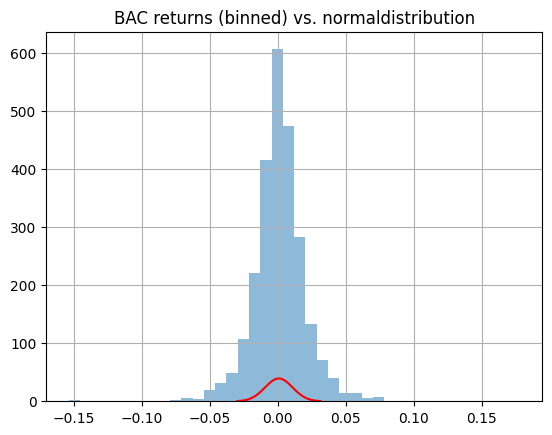

<Figure size 640x480 with 0 Axes>

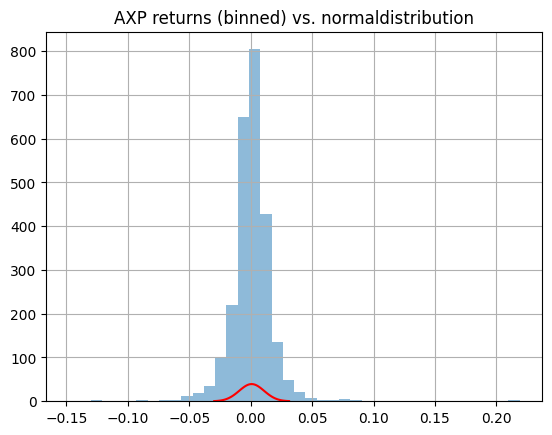

<Figure size 640x480 with 0 Axes>

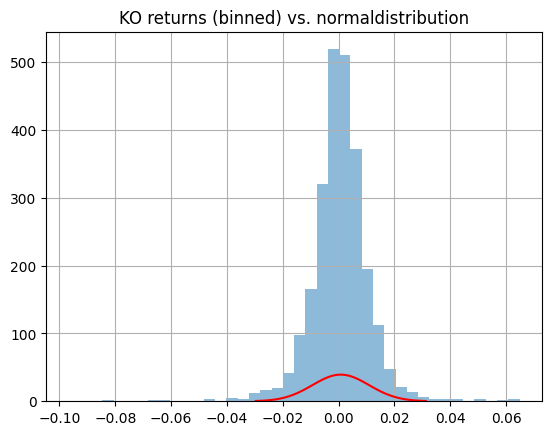

In [16]:
import scipy

for c in stocks:
    fig = plt.figure()
    df_returns[c].hist(bins=40, histtype='stepfilled', alpha=0.5)
    x = np.linspace(port_mean - 3 * port_std, port_mean + 3 * port_std, 100)
    plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_std), "r") 
    plt.title(c + " returns (binned) vs. normaldistribution")
plt.show()

Normality Tests for AAPL:
Shapiro-Wilk Test: p-value = 0.0000
--------------------------------------------------
Skewness: Ticker
AAPL   -0.130281
dtype: float64
Kurtosis: Ticker
AAPL    6.415444
dtype: float64


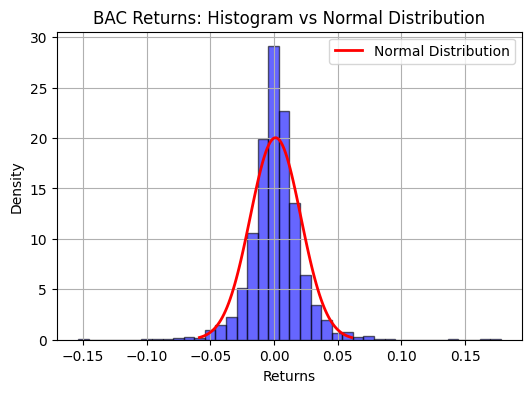

Normality Tests for BAC:
Shapiro-Wilk Test: p-value = 0.0000
--------------------------------------------------
Skewness: Ticker
BAC    0.277912
dtype: float64
Kurtosis: Ticker
BAC    9.285682
dtype: float64


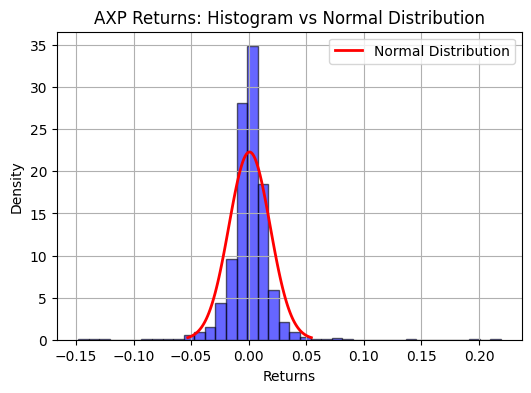

Normality Tests for AXP:
Shapiro-Wilk Test: p-value = 0.0000
--------------------------------------------------
Skewness: Ticker
AXP    1.324195
dtype: float64
Kurtosis: Ticker
AXP    30.127672
dtype: float64


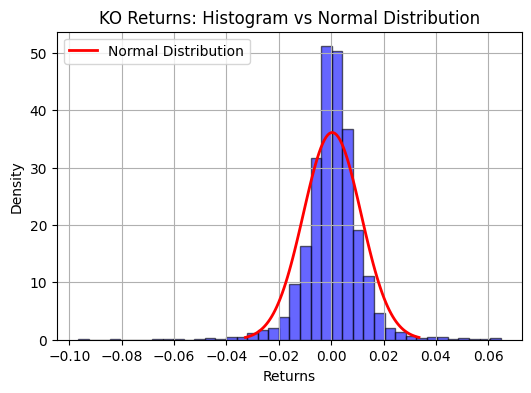

Normality Tests for KO:
Shapiro-Wilk Test: p-value = 0.0000
--------------------------------------------------
Skewness: Ticker
KO   -0.661384
dtype: float64
Kurtosis: Ticker
KO    10.634746
dtype: float64


In [17]:
import scipy.stats as stats
from scipy.stats import shapiro, kstest

for c in stocks:
    fig, ax = plt.subplots(figsize=(6, 4))
    df_returns[c].hist(bins=40, density=True, alpha=0.6, color='blue', edgecolor='black', ax=ax)
    mean = df_returns[c].mean() 
    std = df_returns[c].std()
    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    ax.plot(x, stats.norm.pdf(x, mean, std), "r", lw=2, label="Normal Distribution")

    plt.title(f"{c} Returns: Histogram vs Normal Distribution")
    plt.xlabel("Returns")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

    print(f"Normality Tests for {c}:")
    
    # Shapiro-Wilk Test (Small datasets)
    shapiro_stat, shapiro_p = shapiro(df_returns[c].dropna())
    print(f"Shapiro-Wilk Test: p-value = {shapiro_p:.4f}")
    
    print("-" * 50)
    print("Skewness:", df_returns[c].skew())
    print("Kurtosis:", df_returns[c].kurtosis())

In [18]:
print("Skewness:", df_returns.skew())
print("Kurtosis:", df_returns.kurtosis())

Skewness: Price  Ticker
AAPL   AAPL     -0.130281
BAC    BAC       0.277912
AXP    AXP       1.324195
KO     KO       -0.661384
dtype: float64
Kurtosis: Price  Ticker
AAPL   AAPL       6.415444
BAC    BAC        9.285682
AXP    AXP       30.127672
KO     KO        10.634746
dtype: float64


## CVaR

From the skewness and kurtosis values of our stocks (AAPL, BAC, AXP, KO), we can see that:

📌 1. Skewness:

AAPL (-0.13) & KO (-0.66) → Slightly left-skewed, meaning more extreme negative returns.

BAC (0.27) → Slightly right-skewed, indicating more positive extreme returns.

AXP (1.32) → Highly right-skewed, meaning a strong tendency for extreme positive returns.

📌 2. Kurtosis(Fat Tails):

All stocks have kurtosis > 3, indicating fat tails (higher likelihood of extreme price movements).
AXP (30.13), BAC (9.28), KO (10.63), AAPL (6.41) → These values are significantly higher than 3, suggesting that large jumps or crashes occur more frequently than a normal distribution would predict.

Since our stock returns are not normally distributed and have significant fat tails, we rely on CVaR (Expected Shortfall) instead of traditional VaR to better capture the true downside risk

In [19]:
import scipy.stats as stats

n_simulations = 100000 
alpha = 0.05
dof = 5

In [20]:
# t distibution with degree of freedom controlling the fat tails
simulated_returns = stats.t.rvs(dof, loc=port_mean, scale=port_std, size=n_simulations)
var_95 = np.percentile(simulated_returns, alpha * 100)
cvar_95 = simulated_returns[simulated_returns <= var_95].mean()
cvar_95_investment = cvar_95 * ini_inves

print(f"Monte Carlo VaR (95%): {var_95:.4f}")
print(f"Monte Carlo CVaR (Expected Shortfall, 95%): {cvar_95:.4f}")
print(f"Monte Carlo CVaR in Investment Terms: ${cvar_95_investment:,.2f}")

Monte Carlo VaR (95%): -0.0198
Monte Carlo CVaR (Expected Shortfall, 95%): -0.0287
Monte Carlo CVaR in Investment Terms: $-28,676.17


📌 Monte Carlo VaR (95%) = -0.0198 (or -1.98%)

There is a 95% probability that portfolio won't lose more than 1.98% in a single day.
Only 5% of the time, the losses will be worse than -1.98%.
Portfolio is worth 1,000,000 ... 1-day VaR = $19,800 loss at worst in 95% of cases.

📌 Monte Carlo CVaR (95%) = -0.0287 (or -2.87%)

Portfolio enters the worst 5% of scenarios, the average loss in these worst cases is -2.87%.
CVaR is always larger (more negative) than VaR because it accounts for tail risks beyond the VaR threshold.
Portfolio is 1,000,000, then the expected loss in the worst-case 5% of days is around $28,700.

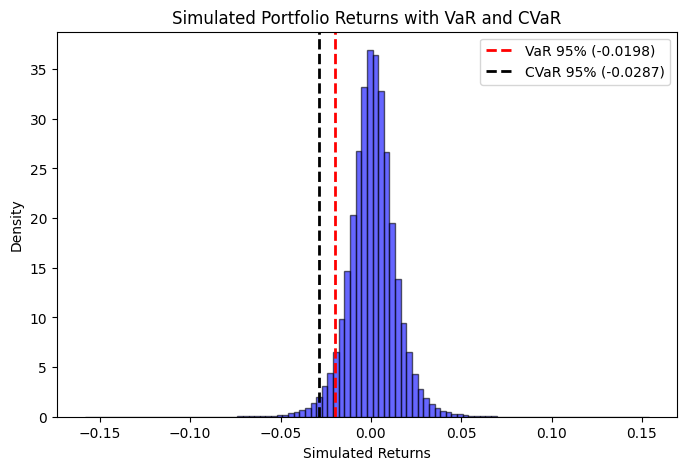

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(simulated_returns, bins=100, density=True, alpha=0.6, color="blue", edgecolor="black")
plt.axvline(var_95, color="red", linestyle="dashed", linewidth=2, label=f"VaR 95% ({var_95:.4f})")
plt.axvline(cvar_95, color="black", linestyle="dashed", linewidth=2, label=f"CVaR 95% ({cvar_95:.4f})")
plt.title("Simulated Portfolio Returns with VaR and CVaR")
plt.xlabel("Simulated Returns")
plt.ylabel("Density")
plt.legend()
plt.show()

CVaR over 20 days: [-28676.17, -40554.24, -49668.59, -57352.35, -64121.88, -70242.0, -75870.03, -81108.47, -86028.52, -90682.03, -95108.11, -99337.18, -103393.42, -107296.42, -111062.35, -114704.7, -118234.9, -121662.71, -124996.55, -128243.75]
20-day CVaR @ 95% confidence: -128243.75


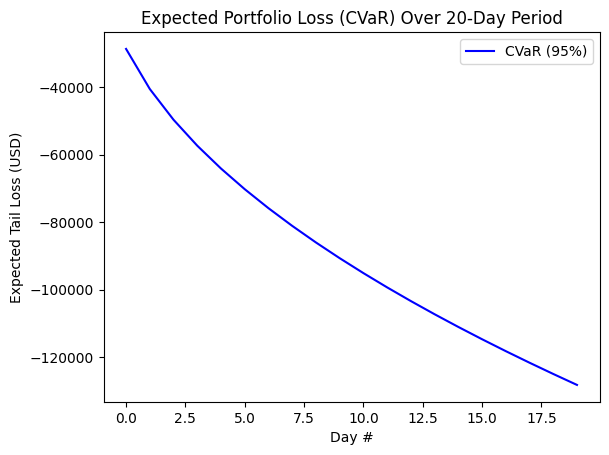

In [22]:
cvar_array = []
num_days = 20 

for x in range(1, num_days + 1):
    cvar_array.append(np.round(cvar_95 * ini_inves * np.sqrt(x), 2)) 

print('CVaR over 20 days:', cvar_array)
print(f"{x}-day CVaR @ 95% confidence: {np.round(cvar_95 *ini_inves* np.sqrt(num_days), 2)}")

plt.xlabel("Day #")
plt.ylabel("Expected Tail Loss (USD)")
plt.title("Expected Portfolio Loss (CVaR) Over 20-Day Period")
plt.plot(cvar_array, "b", label="CVaR (95%)")
plt.legend()
plt.show()

📌 Interpretation of 20-Day CVaR (95%)

1-Day CVaR (95%) = -28,676.17 → If the portfolio enters the worst 5% scenario, the average loss in one day will be -28,676.17.
20-Day CVaR (95%) = -128,243.75 → Over 20 days, in the worst 5% of cases, the expected average loss will be $-128,243.75.

CVaR over 40 days: [-28676.17, -40554.24, -49668.59, -57352.35, -64121.88, -70242.0, -75870.03, -81108.47, -86028.52, -90682.03, -95108.11, -99337.18, -103393.42, -107296.42, -111062.35, -114704.7, -118234.9, -121662.71, -124996.55, -128243.75, -131410.74, -134503.18, -137526.1, -140483.99, -143380.87, -146220.37, -149005.78, -151740.05, -154425.93, -157065.88, -159662.18, -162216.94, -164732.08, -167209.4, -169650.54, -172057.05, -174430.36, -176771.81, -179082.65, -181364.05]
40-day CVaR @ 95% confidence: -181364.05


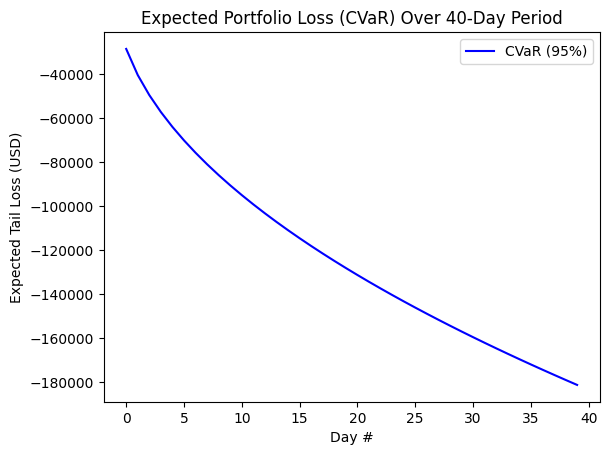

In [23]:
cvar_array = []
num_days = 40 

for x in range(1, num_days + 1):
    cvar_array.append(np.round(cvar_95 * ini_inves * np.sqrt(x), 2)) 

print('CVaR over 40 days:', cvar_array)
print(f"{x}-day CVaR @ 95% confidence: {np.round(cvar_95 *ini_inves * np.sqrt(num_days), 2)}")

plt.xlabel("Day #")
plt.ylabel("Expected Tail Loss (USD)")
plt.title("Expected Portfolio Loss (CVaR) Over 40-Day Period")
plt.plot(cvar_array, "b", label="CVaR (95%)")
plt.legend()
plt.show()

📌 Interpretation of 40-Day CVaR (95%)

1-Day CVaR (95%) = -28,676.17 → In the worst 5% of days, the average daily loss will be -28,676.17.
20-Day CVaR (95%) = -128,243.75 → Over 20 days, the expected average loss in the worst 5% of cases is -128,243.75.
40-Day CVaR (95%) = -181,364.05 → Over 40 days, the expected average loss in the worst 5% of cases is $-181,364.05.